In [1]:
import numpy as np
DTYPE = np.float64
# epsilon = np.finfo(DTYPE).eps
epsilon = 1e-3

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

import pandas as pd

In [2]:
# mol vol.s different for different species

def floryHugginsFreeEnergy(phi:DTYPE, chi:DTYPE):
    res = phi*np.log(phi) + (1-phi)*np.log(1-phi) + chi*phi*(1-phi)
    return res

In [8]:
'''
System Parameters:

Given: the total concentration of component 1 in the system
'''
PHI1_GLOBALs = [DTYPE(0.5)] # Setting the global value of the first component in the system
# PHI1_GLOBALs = DTYPE(np.linspace(epsilon, 1-epsilon, 2)) # Setting the global value of the first component in the system

ETA_GLOBAL = DTYPE(1) # Setting the global system size as 1

'''
Flory Parameter(s)
'''
chi = DTYPE(1.8) # test chi

'''
Compartment Parameters

phi11: concentration of component 1 in compartment 1 -> randomly chosen from a uniform distribution u(0, PHI1_GLOBAL)
phi12: concentration of component 1 in compartment 2
phi21: concentration of component 2 in compartment 1
phi22: concentration of component 2 in compartment 2

eta1: size of compartment 1
'''

# eta1 = np.linspace(0, ETA_GLOBAL, 10, dtype=DTYPE) # Size of compartment 1
eta1 = DTYPE(np.random.uniform(epsilon, ETA_GLOBAL-epsilon, size=1000))
eta2 = 1 - eta1

/tmp/ipykernel_16023/837474423.py:4: RuntimeWarning: invalid value encountered in log
  res = phi*np.log(phi) + (1-phi)*np.log(1-phi) + chi*phi*(1-phi)


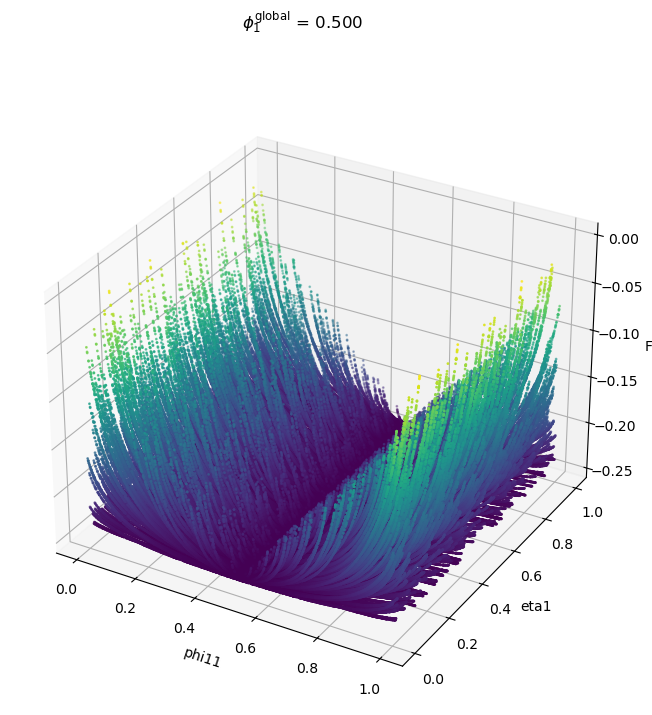

100%|█████████████████████████████████████████████| 1/1 [00:14<00:00, 14.89s/it]


In [9]:
# chi 1.3
'''
Free energies

f1: free energy of compartment 1
f2: free energy of compartment 2

f_total: total free energy of the system
'''

'''
Print output in the form {(phi11, phi12), (eta1, eta2)} = (f1, f2) =  f_total
'''

# f1 = floryHugginsFreeEnergy(phi11, chi)
# f2 = floryHugginsFreeEnergy(phi12, chi)
 
# f_total = eta1*f1 + (1-eta1)*f2 

for PHI1_GLOBAL in tqdm(PHI1_GLOBALs):
    phi11 = DTYPE(np.random.uniform(epsilon, 1-epsilon, size=1000))
    # phi12 = DTYPE((PHI1_GLOBAL - eta1*phi11)/(1 - eta1))
    # phi21 = DTYPE(1 - phi11)
    # phi22 = DTYPE(1 - phi12)

    acceptable_phi11s = []
    acceptable_eta1s = []
    fs = []

    for idx_phi, _ in enumerate(phi11):
        for idx_eta, _ in enumerate(eta1):
            phi12 = DTYPE((PHI1_GLOBAL - eta1[idx_eta]*phi11[idx_phi])/(1 - eta1[idx_eta]))
            
            # print(eta1[idx_eta]*phi11[idx_phi] + eta2[idx_eta]*phi12[idx_phi])
            # if np.isclose(eta1[idx_eta]*phi11[idx_phi] + eta2[idx_eta]*phi12[idx_phi], PHI1_GLOBAL):
            # if (eta1[idx_eta]*phi11[idx_phi] + eta2[idx_eta]*phi12 == PHI1_GLOBAL):
            if (phi11[idx_phi] <= 1 and phi12 <= 1):
                f1 = floryHugginsFreeEnergy(phi11[idx_phi], chi)
                f2 = floryHugginsFreeEnergy(phi12, chi)
                
                f_total = eta1[idx_eta]*f1 + eta2[idx_eta]*f2 
        
                # print(f"({phi11[idx_phi]:.3f}, {phi12[idx_phi]:.3f}), ({eta1[idx_eta]:.3f}, {eta2[idx_eta]:.3f})")
                # print(f"{eta1[idx_eta]:.3f}*({f1:.3f}) + {eta2[idx_eta]:.3f}*({f2:.3f})) = {f_total:.3f} ")

                acceptable_phi11s.append(phi11[idx_phi])
                acceptable_eta1s.append(phi11[idx_eta])
                fs.append(f_total)
                    
    df = pd.DataFrame()
    df["phi11"] = acceptable_phi11s
    df["eta1"] = acceptable_eta1s
    df["F"] = fs
    df["log|F|"] = np.log(np.abs(df["F"]))

    fig = plt.figure(figsize = (12, 8))
    ax = fig.add_subplot(111, projection='3d')
    # sizes = (df['F'] + df['F'].min()) / (df['F'].max() + df['F'].min())*5  # Normalized
    ax.scatter(df['phi11'], df['eta1'], df['F'], c=df['F'], cmap='viridis', s = 1)
    ax.set_xlabel('phi11')
    ax.set_ylabel('eta1')
    ax.set_zlabel('F')
    title = r"$\phi_1^{\text{global}}$ = " + f"{PHI1_GLOBAL:.3f}"
    fig.suptitle(title)
    plt.show()

    # pivot = df.pivot(index='eta1', columns='phi11', values='F')
    
    # plt.figure(figsize=(8, 6))
    # ax = sns.heatmap(pivot, cmap='viridis')
    
    # ax.set_xticks(np.arange(len(pivot.columns)))
    # ax.set_xticklabels([f"{val:.3f}" for val in pivot.columns], rotation=90)
    
    # ax.set_yticks(np.arange(len(pivot.index)))
    # ax.set_yticklabels([f"{val:.3f}" for val in pivot.index], rotation=0);

In [10]:
# chi 2.3
'''
Free energies

f1: free energy of compartment 1
f2: free energy of compartment 2

f_total: total free energy of the system
'''

'''
Print output in the form {(phi11, phi12), (eta1, eta2)} = (f1, f2) =  f_total
'''

# f1 = floryHugginsFreeEnergy(phi11, chi)
# f2 = floryHugginsFreeEnergy(phi12, chi)
 
# f_total = eta1*f1 + (1-eta1)*f2 

for PHI1_GLOBAL in tqdm(PHI1_GLOBALs):
    phi11 = DTYPE(np.random.uniform(epsilon, PHI1_GLOBAL-epsilon, size=10000))
    phi12 = DTYPE((PHI1_GLOBAL - eta1*phi11)/(1 - eta1))
    # phi21 = DTYPE(1 - phi11)
    # phi22 = DTYPE(1 - phi12)

    acceptable_phi11s = []
    acceptable_eta1s = []
    fs = []

    for idx_phi, _ in enumerate(phi11):
        for idx_eta, _ in enumerate(eta1):
            # print(eta1[idx_eta]*phi11[idx_phi] + eta2[idx_eta]*phi12[idx_phi])
            if (eta1[idx_eta]*phi11[idx_phi] + eta2[idx_eta]*phi12[idx_phi] == PHI1_GLOBAL):
                if (phi11[idx_phi] <= 1 and phi12[idx_phi] <= 1):
                    f1 = floryHugginsFreeEnergy(phi11[idx_phi], chi)
                    f2 = floryHugginsFreeEnergy(phi12[idx_phi], chi)
                    
                    f_total = eta1[idx_eta]*f1 + eta2[idx_eta]*f2 
            
                    # print(f"({phi11[idx_phi]:.3f}, {phi12[idx_phi]:.3f}), ({eta1[idx_eta]:.3f}, {eta2[idx_eta]:.3f})")
                    # print(f"{eta1[idx_eta]:.3f}*({f1:.3f}) + {eta2[idx_eta]:.3f}*({f2:.3f})) = {f_total:.3f} ")
    
                    acceptable_phi11s.append(phi11[idx_phi])
                    acceptable_eta1s.append(phi11[idx_eta])
                    fs.append(f_total)
                    
    df = pd.DataFrame()
    df["phi11"] = acceptable_phi11s
    df["eta1"] = acceptable_eta1s
    df["F"] = fs
    df["log|F|"] = np.log(np.abs(df["F"]))

    fig = plt.figure(figsize = (12, 8))
    ax = fig.add_subplot(111, projection='3d')
    sizes = (df['F'] + df['F'].min()) / (df['F'].max() + df['F'].min())*5  # Normalized
    ax.scatter(df['phi11'], df['eta1'], df['F'], c=df['F'], cmap='viridis', s = sizes)
    ax.set_xlabel('phi11')
    ax.set_ylabel('eta1')
    ax.set_zlabel('F')
    title = r"$\phi_1^{\text{global}}$ = " + f"{PHI1_GLOBAL:.3f}"
    fig.suptitle(title)
    # plt.show()

    # pivot = df.pivot(index='eta1', columns='phi11', values='F')
    
    # plt.figure(figsize=(8, 6))
    # ax = sns.heatmap(pivot, cmap='viridis')
    
    # ax.set_xticks(np.arange(len(pivot.columns)))
    # ax.set_xticklabels([f"{val:.3f}" for val in pivot.columns], rotation=90, fontsize = 4)
    
    # ax.set_yticks(np.arange(len(pivot.index)))
    # ax.set_yticklabels([f"{val:.3f}" for val in pivot.index], rotation=0, fontsize = 4);

  0%|                                                     | 0/1 [00:00<?, ?it/s]


ValueError: operands could not be broadcast together with shapes (1000,) (10000,) 